# KRIPTOVALUTE

Za uvod v kriptovalute sem si izbrala tri najbolj znane kriptovalute: Bitcoin, Ether in Litecoin. Vse tri imajo drugačno ceno na trgu, drugačno gibanje cen in zaradi tega je analiziranje kriptovalut še bolj zanimivo. 

V tem projektu se bom osredotočila na gibanje cen različnih kriptovalut na trgu. Poskušala bom najti racionalne primerjave in napovedi različnih kriptovalut.

#### Uvoz knjižnic

In [117]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


# Lepše izrisani grafi
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20, 7)  

# Lepši izpis števil v tabelah
pd.set_option('float_format', '{:f}'.format)    
pd.options.display.float_format = "{:.2f}".format

## UVOD

## Pridobivanje podatkov iz interneta

Kot že omenjeno, bom projekt začela s tremi najbolj znanimi kriptovalutami.

($\textbf{Komentar: }$ vse cene so dane v USD.)

Podatki so dobljeni s spletne strani: https://coinmarketcap.com/. Za vsako kriptovaluto imamo začetno ($\scriptsize{\textbf{Open}}$) in končno ($\scriptsize{\textbf{Close}}$) ceno vsakega dneva od začetka posamične kriptovalute. Podatki vsebujejo tudi najvišjo ($\scriptsize{\textbf{High}}$) in najnižjo ($\scriptsize{\textbf{Low}}$) ceno v dnevu, dnevno trgovano količino ($\scriptsize{\textbf{Volume}}$) in kapitalizacijo trga ($\scriptsize{\textbf{Market Cap}}$), ki nam pove, kakšen je zmnožek števila kovancev in cene na kovanec.

Funkcija za pridobivanje podatkov $\color{orange} {download\_data\_to\_csv}$ se nahaja v datoteki ${\color{blue} {pridobivanje\_podatkov.py}}$ v mapi s funkcijami.

Podatke preberemo in na mesta, kjer nimamo podatkov (pri danih podatkih je to takrat, ko je vrednost celice "-"), vrednost nastavimo na NaN.

In [118]:
data_bitcoin = (pd.read_csv('podatki/bitcoin.csv', parse_dates=['Date'], index_col = ['Date'])).replace('-',np.NaN)
data_ether = (pd.read_csv('podatki/ether.csv', parse_dates=['Date'], index_col = ['Date'])).replace('-',np.NaN)
data_litecoin = (pd.read_csv('podatki/litecoin.csv', parse_dates=['Date'], index_col = ['Date'])).replace('-',np.NaN)

Za predstavo si poglejmo tabelo podatkov za Bitcoin.

In [119]:
data_bitcoin[:10]

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-12-31,12897.70,14377.40,12755.60,14156.40,12136300000,216326000000
2017-12-30,14681.90,14681.90,12350.10,12952.20,14452600000,246224000000
2017-12-29,14695.80,15279.00,14307.00,14656.20,13025500000,246428000000
2017-12-28,15864.10,15888.40,13937.30,14606.50,12336500000,265988000000
2017-12-27,16163.50,16930.90,15114.30,15838.50,12487600000,270976000000
2017-12-26,14036.60,16461.20,14028.90,16099.80,13454300000,235294000000
2017-12-25,13995.90,14593.00,13448.90,14026.60,10664700000,234590000000
2017-12-24,14608.20,14626.00,12747.70,13925.80,11572300000,244824000000
2017-12-23,13948.70,15603.20,13828.80,14699.20,13086000000,233748000000


## Grafi kriptovalut (Bitcoin, Ether, Litecoin)

Najprej bomo narisali vsak graf posebej, ker se cene med kriptovalutami tako razlikujejo, da je težko opaziti gibanje vsake valute posebej, če so le te na enem grafu.

#### Bitcoin

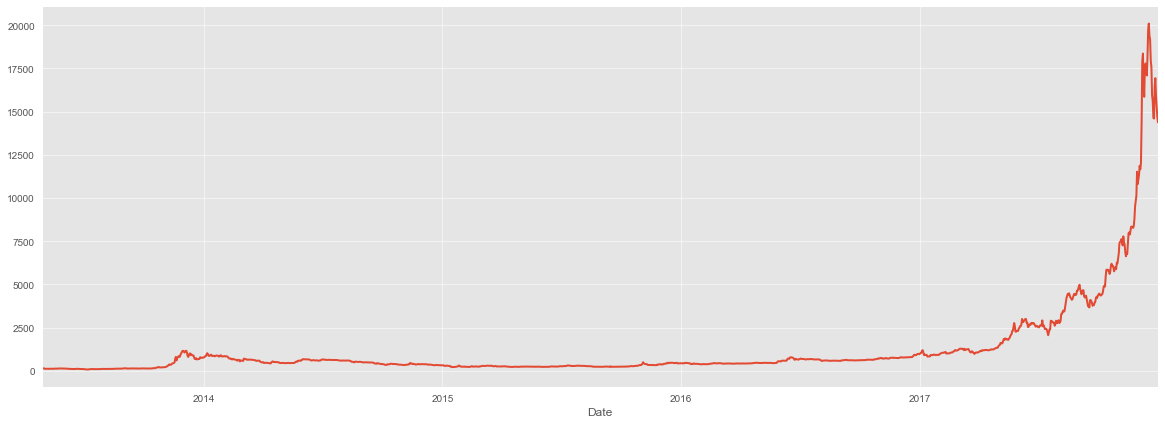

In [120]:
data_bitcoin['High'].plot().invert_xaxis()

In [121]:
data_bitcoin['High'].max()

20089.0

Iz grafa vidimo skoraj eksponentno rast v letu 2017. Zanimivo je, da je od leta 2013 do začetka leta 2017 svojo vrednost vzdrževala pod 1000€, v letu 2017 pa je najvišja vrednost bila kar 20.089€.

#### Ether

Kriptovaluta Ether je na trgu od leta 2015, vrednost pa je kot pri Bitcoinu najbolj naraščala v letu 2017. 

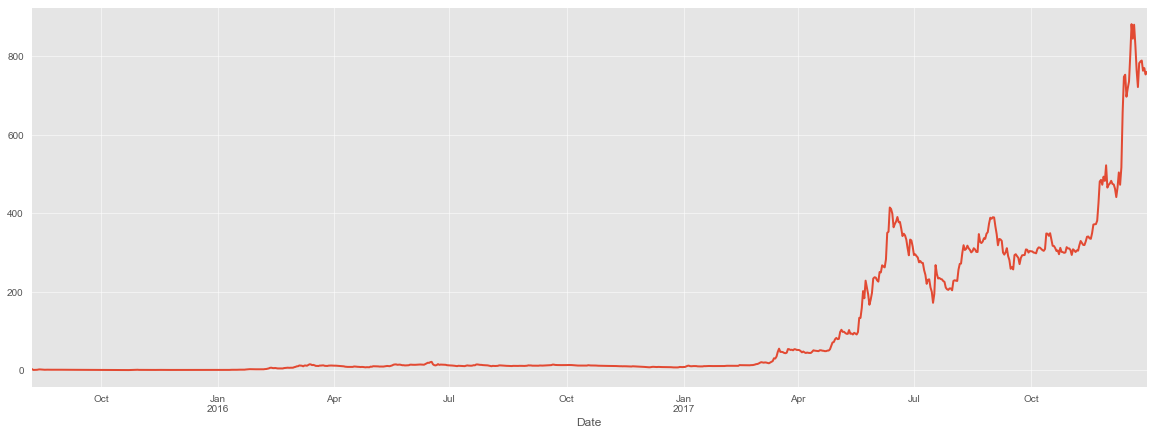

In [122]:
data_ether['High'].plot().invert_xaxis()

#### Litecoin

Litecoin je na trgu že od leta 2013, prav tako pa vidimo, da je njegova vrednost začela naraščati v letu 2017.

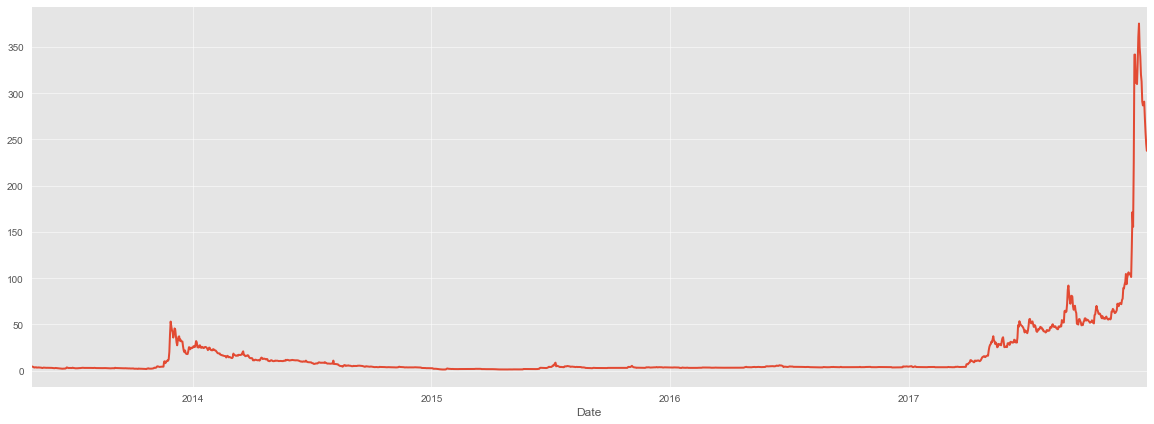

In [123]:
data_litecoin['High'].plot().invert_xaxis()

Zgornji grafi lepo prikazujejo večanjre vrednosti treh glavnih kriptovalut v letu 2017. Razlogi za te velike vzpone so v vse večjem povpraševanju po kripto trgu.

Prav gotovo zelo izstopa Bitcoin, ki ima skoraj desetkrat večje vrednoti kot Ether ali Litecoin. Zanimivo pa bi bilo videti tudi ostale kriptovalute, ki mogoče niso tako poznane. Zato bomo v ta namen iz zgoraj omenjene spletne strani pridobili podatke še za ostale obstoječe kriptovalute na trgu.

## ANALIZA KRIPTOVALUT

## Uvoz in čiščenje podatkov

Na trgu imamo čez 1000 različnih kriptovalut, vsako z drugačno ceno in drugačnim cenovnim gibanjem.

V ${\color{blue} {pridobivanje\_podatkov.py}}$ uporabimo funkcijo $\color{orange} {all\_cryptos}$, ki shrani tabelo s podatki v csv. Za vsako kriptovaluto izvemo:
- ime (Name)
- simbol (Symbol)
- kapitalizacijo trga (Market Cap)
- ceno (Price)
- zaloga v obtoku (Circulating Supply)
- količina (Volume)
- procentualni vzponi in padci (Percantage ups and downs)

($\scriptsize{\textbf{Komentar: }}$ podatki so od nastanka posamezne kriptovalute do 31. decembra 2017.)

V tabeli moramo prečistiti podatke, preimenovati stolpce in spremeniti tipe stolpcev, ki prikazujejo cene, količino ali procente v tip float. To je narejeno v datoteki ${\color{blue} {pridobivanje\_podatkov.py}}$ z uporabo funkcije $\color{orange} {all\_cryptos}$, ki dobljene podatke še prečisti.

In [124]:
all_cryptos = pd.read_csv('podatki/vse_kriptovalute.csv', index_col = ['#'])
all_cryptos[:10]

,Name,Symbol,MarketCap,Price,CirculatingSupply,Volume24h,%1h,%24h,%7d
#,,,,,,,,,
1,BTC Bitcoin,BTC,285875344970.00,17029.20,16787362.00,16426600000.00,-0.14,0.09,28.57
2,XRP Ripple,XRP,125500495821.00,3.24,38739144847.00,2432480000.00,0.09,5.38,46.89
3,ETH Ethereum,ETH,109221561481.00,1128.02,96825909.00,5190980000.00,0.61,8.79,55.24
4,BCH Bitcoin Cash,BCH,50037882844.00,2961.15,16898125.00,1890020000.00,0.33,13.22,20.24
5,ADA Cardano,ADA,26311828265.00,1.01,25927070538.00,252846000.00,1.21,0.03,44.82
6,LTC Litecoin,LTC,16542288436.00,302.68,54652008.00,1549920000.00,0.58,-0.39,37.61
7,XEM NEM,XEM,15772769998.00,1.75,8999999999.00,75297500.00,3.31,5.90,85.74
8,XLM Stellar,XLM,12403983759.00,0.69,17877838108.00,422846000.00,1.09,-5.90,113.45
9,TRX TRON,TRX,11252408653.00,0.17,65748192475.00,1826270000.00,4.43,-2.03,351.89


Sedaj ko imamo podatke za vse kriptovalute, ki so 31. 12. 2017 kotirale na borzi, bomo določili kriterij, s katerim bomo izločili manj zanimive podatke (kriptovalute, s katerimi se najmanj trguje). 
Ker je čim večji zaslužek eden izmed največjih razlogov za trgovanje s kriptovalutami, bomo gledali kriptovalute, s katerimi se največ trguje (največji Volume), kar privede tudi do naraščanja cen valute. 

$\scriptsize{\textbf{Opomba: }}$ Odstranimo dve kriptovaluti z istim imenom, ki pa za analizo nista relevantni.

In [125]:
kriptovalute = all_cryptos[all_cryptos['Volume24h'] >= 15000]
kriptovalute = kriptovalute[kriptovalute.Symbol != "THC"]
kriptovalute = kriptovalute[kriptovalute.Symbol != "HMP"]
kriptovalute = kriptovalute.sort_values(by = ['Volume24h'], ascending = False)
kriptovalute

,Name,Symbol,MarketCap,Price,CirculatingSupply,Volume24h,%1h,%24h,%7d
#,,,,,,,,,
1,BTC Bitcoin,BTC,285875344970.00,17029.20,16787362.00,16426600000.00,-0.14,0.09,28.57
3,ETH Ethereum,ETH,109221561481.00,1128.02,96825909.00,5190980000.00,0.61,8.79,55.24
14,QTUM Qtum,QTUM,6927777134.00,93.89,73789796.00,2561260000.00,-1.43,50.84,55.31
36,USDT Tether,USDT,1482271584.00,1.01,1468089837.00,2468240000.00,0.76,0.79,0.17
2,XRP Ripple,XRP,125500495821.00,3.24,38739144847.00,2432480000.00,0.09,5.38,46.89
4,BCH Bitcoin Cash,BCH,50037882844.00,2961.15,16898125.00,1890020000.00,0.33,13.22,20.24
9,TRX TRON,TRX,11252408653.00,0.17,65748192475.00,1826270000.00,4.43,-2.03,351.89
6,LTC Litecoin,LTC,16542288436.00,302.68,54652008.00,1549920000.00,0.58,-0.39,37.61
13,EOS EOS,EOS,7543222764.00,12.82,588606112.00,923843000.00,0.69,17.79,49.31


Z zgornjim kriterijem dobimo 785 različnih kriptovalut za analizo.

## Največji volumen dnevnega trgovanja

Sedaj imamo kriptovalute, s katerimi se je 31. decembra največ trgovalo (predvidevamo, da je količina trgovanja v večini dni skoraj enaka).


Najprej si bomo pogledali, kakšna je bila povezava med ceno in količino trgovanja na 31. december 2017. 

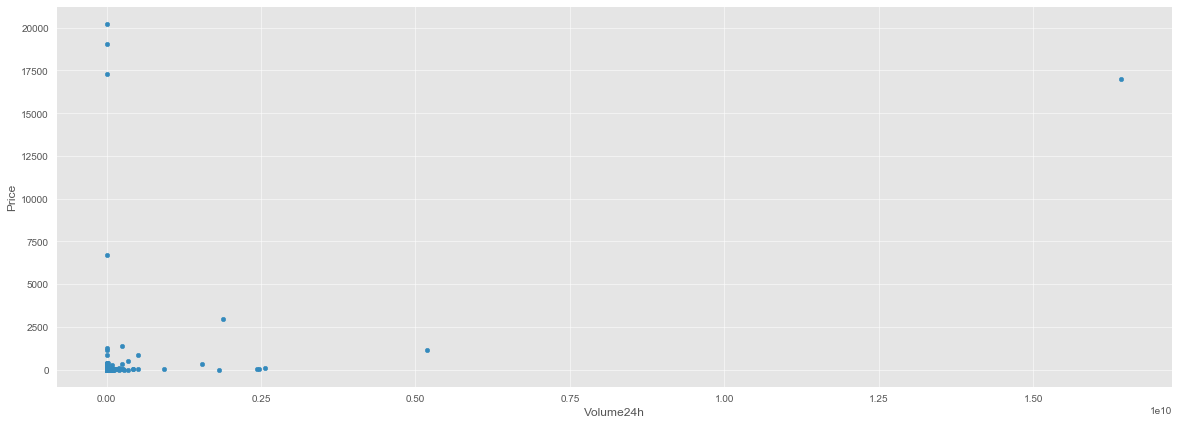

In [126]:
kriptovalute.plot.scatter(x = 'Volume24h', y = 'Price')

Ker imamo zaradi Bitcoina znova manj informativen graf o drugih kriptovalutah, si poglejmo še razsevni grafikon brez Bitcoina (na grafu skrajno desno).
Nekatere kriptovalute imajo zelo visoko ceno, se pa z njimi ne trguje veliko, kar je lahko posledica višine cene.

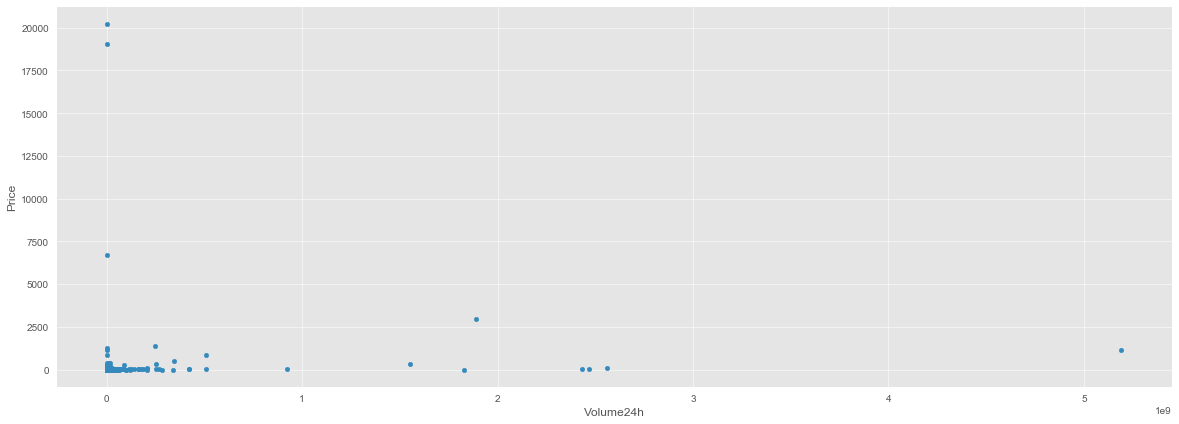

In [127]:
kriptovalute_brez_BTC = kriptovalute[kriptovalute.Symbol.str.contains("BTC") == False]
kriptovalute_brez_BTC.plot.scatter(x = 'Volume24h', y = 'Price')

Kot v prejšnjem grafikonu vidimo, da je največja zgostitev pri manjši ceni in manjšemu volumnu trgovanja (večina izmed 785 kriptovalut ima ceno in volumen trgovanja ekvivalentno trgu). Imamo sicer tri izjeme, ki imajo pri zelo mali količini trgovanja velike cene (kar je najverjetneje razlog, da se z njimi tako malo trguje).

Iz tega grafa vidimo, da so cene kriptovalut najbolj zgoščene pod 2.000 $\$$. Prav tako je dnevna količina trgovanja pri večini kriptovalut manjša od 250 mio. 

Zanimivo pa je, da imajo kriptovalute, ki so 31. decembra bile najbolj trgovane, večinoma podobne cene kot ostale kriptovalute, s katerimi se trguje veliko manj (izjema je seveda Bitcoin). 

Da pa bomo videli še kriptovalute v zgoščenem delu, bomo še bolj približali grafikon.

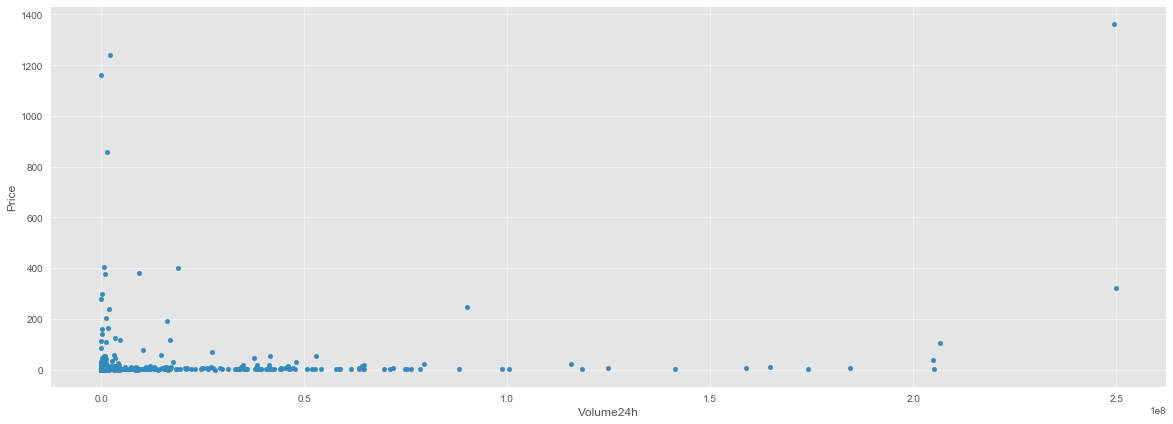

In [128]:
kriptovalute_zoom = kriptovalute[(kriptovalute['Volume24h'] < 250000000) & (kriptovalute['Price'] < 2500)] 
kriptovalute_zoom.plot.scatter(x = 'Volume24h', y = 'Price')

Zgostitev imamo še vedno pri nizkih cenah in relativno nizkem volumnu trgovanja. Največ kriptovalut ima ceno pod 100 USD, je pa razpon med trgovanjem s približno enakimi cenami tako velik, da bi težko govorili o povezavi med ceno kriptovalute (na dan 31. decembra 2017) in količino trgovajanja. Res pa je, da le majhen del trgovanih valut presega 50mio dnevnega trgovanja.



Iz zgornjih podatkov, kjer imamo kriptovalute, ki so 31. decembra 2017 imele vrednost "Volume24" nad 15000 $\$$ smo podatke za vsako kriptovaluto posebej shranili v tabelo s stolpci:
- Date
- Open
- High
- Low
- Close
- Volume
- MarketCap
- Name (dodan stolpecz imenom za analizo)


(Funkcija, ki pridobi vse podatke in jih shrani v tabelo se nahaja v mapi python_funkcije v datoteki ${\color{blue} {pridobivanje\_podatkov.py}}$.)

In [129]:
volumen = pd.read_csv('podatki/kriptovalute_max_volume.csv', parse_dates = ["Date"], index_col = ['Date'])

$\scriptsize{\textbf{Opomba}}$: Nekatere kriptovalute imajo vrednosti $0.00$, kljub trgovanju. Razlog za to so zelo nizke cene kriptovalute (neničelna števila se pojavijo na 4. decimalki ali celo kasneje).


Za nadaljno analizo bi radi vedeli, koliko kriptovalut je imelo v letu 2017 v povprečju največji obtok trgovanja. 

In [130]:
max_volume = volumen.groupby(['Name'])['Volume'].mean()
# max_volume

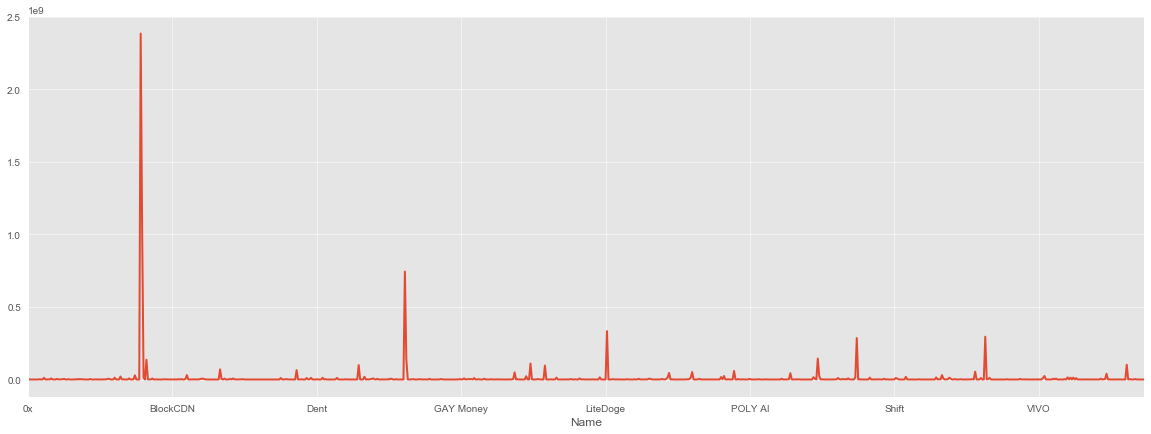

In [131]:
max_volume.plot()

Iz zgornjega grafa vidimo, da je večina kriptovalut imela nizko povprečno kapaciteto trgovanja v letu 2017 v primerjavi z nekaj izjemami. Pet kriptovalut vidno izstopa, na grafu pa je vidnih še nekaj manjših odstopanj od povprečja. 

Trg kriptovalut je velik, na grafu pa lahko vidimo, da se trguje večinoma le s tremi oz. s petimi kriptovalutami. V letu 2017 smo že prej videli velike skoke v količini trgovanja (pri najpopularnejših valutah - Bitcoin, Ether in Litecoin). 

Najpomembnejši vprašanji investitorjev v kriptovalute sta: kdaj kupiti katero kriptovaluto in kdaj katero prodati. Težko je napovedati, kdaj je pametno investirati v kaj. Kupuje se sicer takrat, ko je cena kriptovalute majhna, vendar nam nič ne daje zagotovila, da bo kdarkoli cena narastla oz. da njena vrednost nikoli ne bo padla. Pametni investitorji se pred tveganjem zavarujejo tako, da razpršijo svoje imetje v več kriptovalut. Tako pri padcu cene kakšne kriptovalute pokrijejo izgubo s tistimi kriptovalutami, ki so narastle. 
Kot že prej omenjeno, je na trgu več kot 1000 kriptovalut - na mesečni ravni jih nekaj propade, nekaj pa jih na novo pride na trg.

### Delež dnevnega trgovanja "največjih" kriptovalut

Naslednji graf prikazuje, kakšen delež celotnega dnevnega trgovanja predstavljajo Bitcoin, Ethereum, Litecoin in Ripple. 

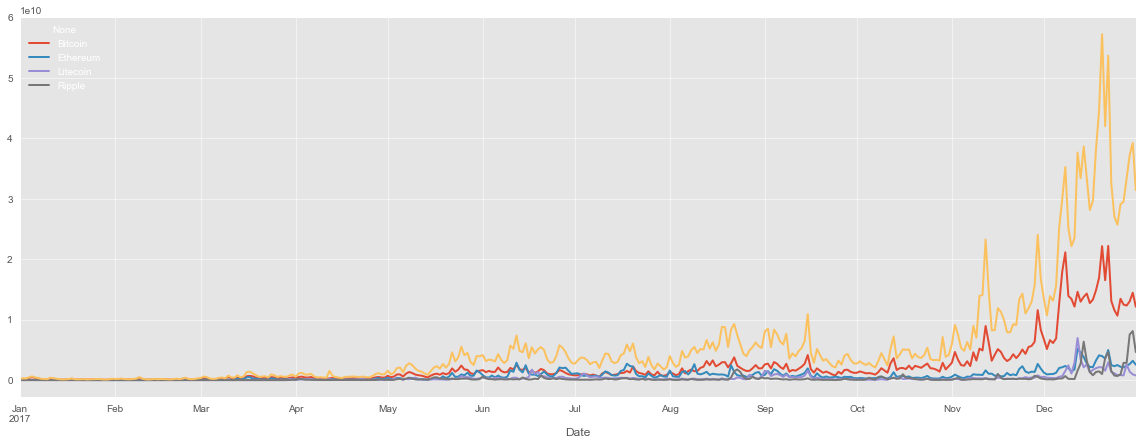

In [143]:
volumen["Volume"] = pd.to_numeric(volumen["Volume"], errors = "coerce")

for name in ["Bitcoin", "Ethereum", "Litecoin", "Ripple"]:
    volumen[volumen["Name"] == name]["Volume"].plot(label = name).invert_xaxis()
    plt.legend()

volumen.groupby(volumen.index)["Volume"].sum().plot()

Do meseca maja zaradi nižje kapacitete trgovanja ni razvidno, katera kriptovaluta je po deležu vodilna. Od meseca maja in do novembra so vse kriptovalutne kar enakovredne po deležu, medtem ko je od novembra naprej trgovanje z Bitcoinom prevladalo nad ostalimi. Litecoin, Ripple in Ethereum so v mesecu decembru imeli zelo podobne deleže, pri čemer je proti koncu količina trgovanja z Litecoinom padla, količina Rippla pa malenkost narastla (po nekaj skokih).

Vidimo, da količina trgovanja nikoli ni konstantno naraščala. Ves čas so prisotni skoki, ki so najbolj drastični v mesecu decembru, ko je trg doživel svoj maksimum, nato pa imel rapidni padec. Razlog ?????????

### Delež dnevnega Market Cap-a "največjih" kriptovalut

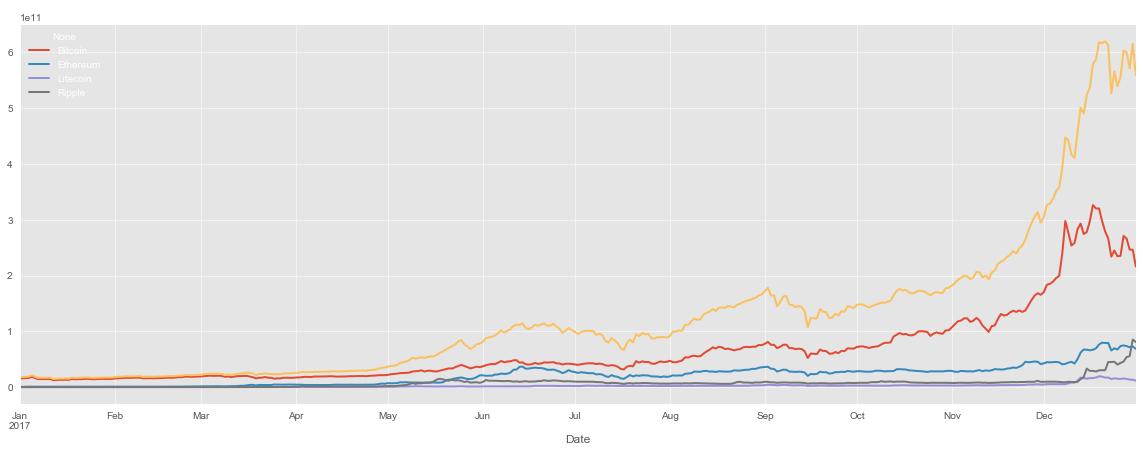

In [144]:
volumen["MarketCap"] = pd.to_numeric(volumen["MarketCap"], errors = "coerce")

for name in ["Bitcoin", "Ethereum", "Litecoin", "Ripple"]:
    volumen[volumen["Name"] == name]["MarketCap"].plot(label = name).invert_xaxis()
    plt.legend()


volumen.groupby(volumen.index)["MarketCap"].sum().plot(title = "MarketCap")

## Gibanje maksimalnih dnevnih cen

Za analiziranje trendov cen razlicnih kriptovalut se uporablja vec statističnih metod. Ker imamo opravka s časovnimi vrstami, je glajenje vrste primerna metoda za analizo, saj vsebuje vse bistvene vzorce, ne vsebuje pa šuma in drugih mikrostruktur v podatkih. V zglajeni vrsti lažje odkrijemo dinamiko pojava in jo uporabimo za napovedovanje. 

Uporabili bomo dve vrsti glajenja - glajenje z drsečim povprečjem in eksponentno glajenje.

#### Glajenje z drsečim povprečjem

Glajenje z drsečim povprečjem reda k časovni vrsti priredi glajene vrednosti, ki so povprečja zadnjih k vrednosti.
V ${\color{blue} {analyzing\_data.py}}$ izračunamo glajene vrednosti in jih shranimo v csv. Glajene vrednosti računamo glede na maksimalne dnevne vrednosti za reda $k = 5$ in $k = 14$.

###### k = 5:

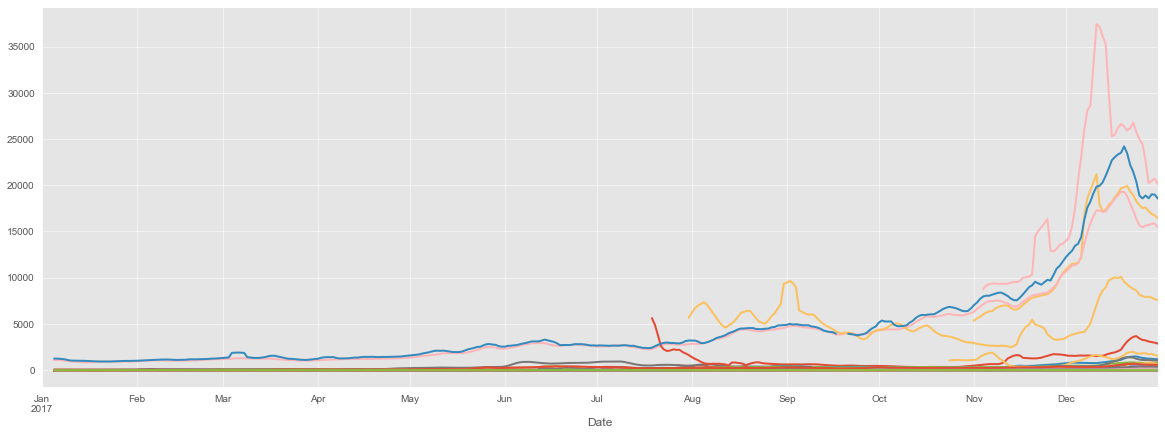

In [135]:
glajene_vrednosti5 = pd.read_csv('podatki/glajene_vrednosti_drsece_povprecje_high_5.csv', squeeze=True, parse_dates = ["Date"], index_col = 'Date')
#vrednosti5 = glajene_vrednosti5.groupby(['Name'])['GlajeneVrednosti']
pd.pivot_table(data = glajene_vrednosti5, values = "GlajeneVrednosti", columns = "Name", index = "Date").plot(legend = False)

###### k = 14:

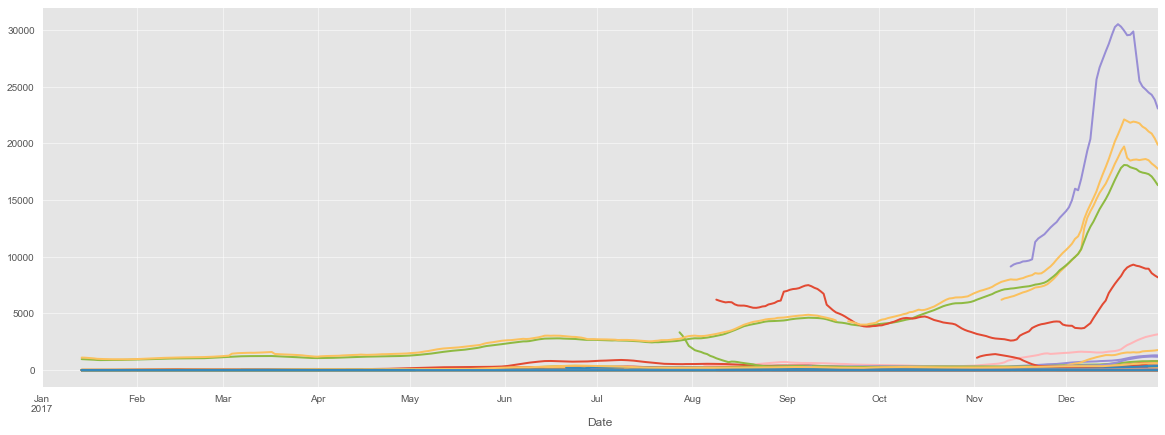

In [136]:
glajene_vrednosti14 = pd.read_csv('podatki/glajene_vrednosti_drsece_povprecje_high_14.csv', squeeze=True, parse_dates = ["Date"], index_col = 'Date')
# vrednosti = glajene_vrednosti.groupby(['Name'])['GlajeneVrednosti']
pd.pivot_table(data = glajene_vrednosti14, values = "GlajeneVrednosti", columns = "Name", index = "Date").plot(legend = False)

Na obeh grafih vidimo, da je trg kriptovalut s cenami posamzenih kriptovalut dosegel vrhunec, prav tako pa grafa opozarjata na predviden še večji padec cen v januarju.  ??????

#### Eksponentno glajenje

Eksponentno glajenje s parametrom alpha časovni vrsti priredi glajene vrednosti z rekurzivno formulo.
V ${\color{blue} {analyzing\_data.py}}$ izračunamo glajene vrednosti in jih shranimo v csv. Glajene vrednosti računamo glede na maksimalne dnevne vrednosti za $\alpha = 0.5$.

Rekurzivna formula (vrednosti $l_i$ so glajene vrednosti, vrednosti $y_i$ pa originalni podatki):
$$l_1 = y_1$$
$$l_t = \alpha y_t + (1- \alpha)l_{t-1}$$

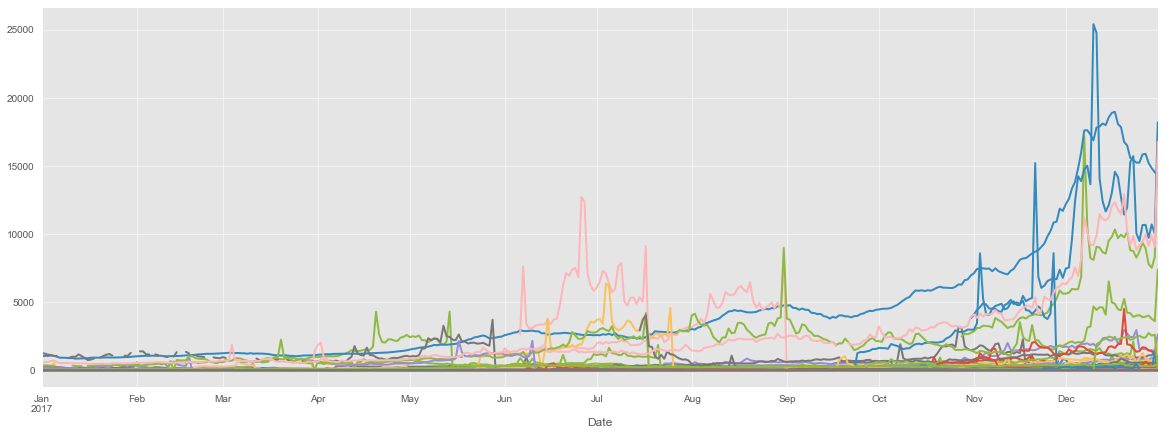

In [137]:
glajene_vrednosti05 = pd.read_csv('podatki/glajene_vrednosti_eksponentno_05.csv', squeeze=True, parse_dates = ["Date"], index_col = 'Date')
#vrednosti5 = glajene_vrednosti5.groupby(['Name'])['GlajeneVrednosti']
pd.pivot_table(data = glajene_vrednosti05, values = "GlajeneVrednosti", columns = "Name", index = "Date").plot(legend = False)

### Gibanje štirih najbolj razširjenih kriptovalut

Iz zgornjih grafov, kjer smo gledali gibanje cen celotnega trga, zaradi količine podatkov ni razvidno, kako se obnašajo najbolj trgovane kriptovalute. Zato si lahko ogledamo glajena povprečja (vsa glajenja ene posamične kriptovalute predstavimo na enem grafu). Iz glajenj bi lahko ugotovili npr. ciklično gibanje posamezne kriptovalute.

Na graf posamezne kriptovalute bomo za primerajo dali še glajeno povprečje ?????????????

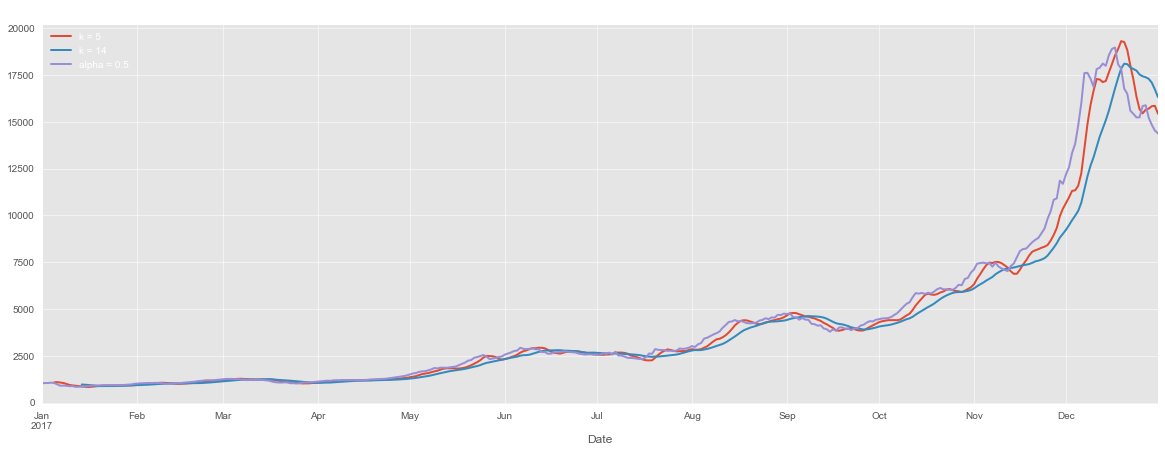

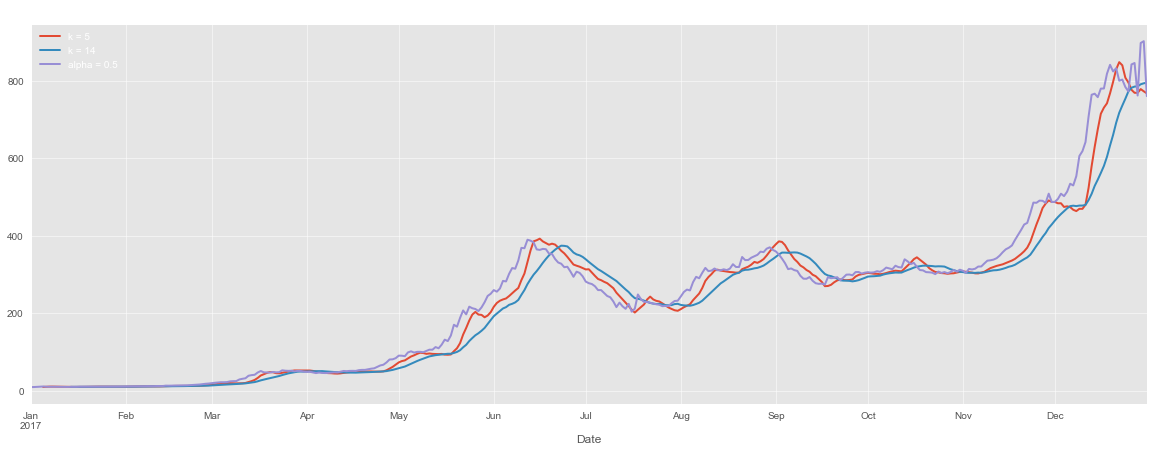

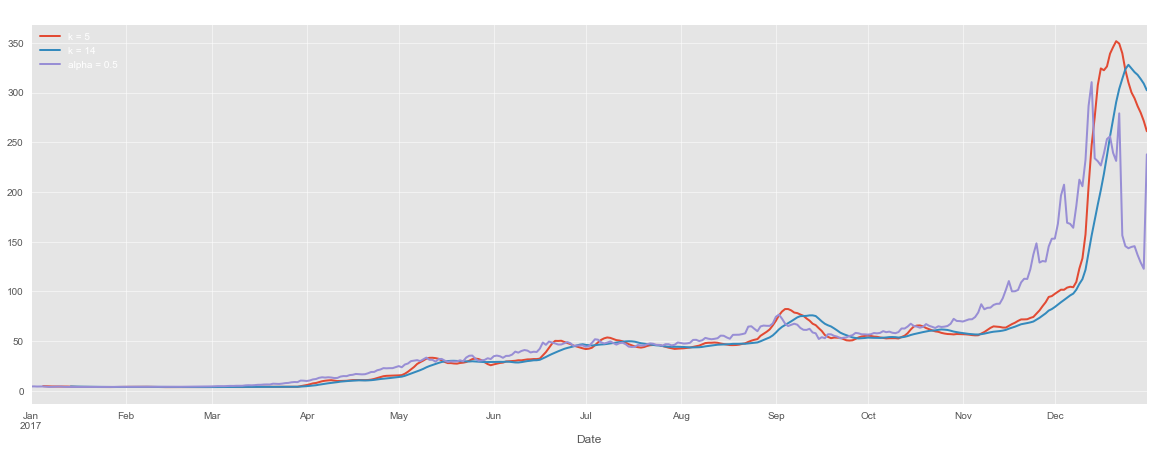

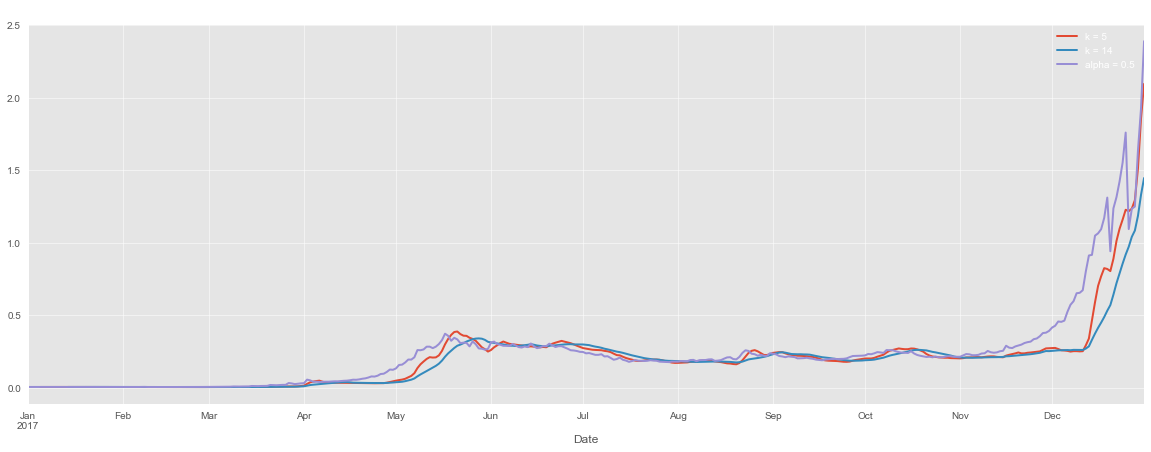

In [138]:
for name in ["Bitcoin", "Ethereum", "Litecoin", "Ripple"]:
    glajene_vrednosti5[glajene_vrednosti5["Name"] == name]["GlajeneVrednosti"].plot(title = name, label = "k = 5").invert_xaxis()
    glajene_vrednosti14[glajene_vrednosti14["Name"] == name]["GlajeneVrednosti"].plot(title = name, label = "k = 14").invert_xaxis()
    glajene_vrednosti05[glajene_vrednosti05["Name"] == name]["GlajeneVrednosti"].plot(title = name, label = "alpha = 0.5").invert_xaxis()
    plt.legend()
    plt.show()

Na nobenem od zgornjih grafov ni razvidne ciklične, kar potrjuje lastnost kripto trga - nepredvidljivost. Vrednosti so večinoma naraščale skozi leto. 
Glajene vrednosti različnih metod z ignoranje šokov in šumov jasneje prikazujejo gibanje cen posameznih kriptovalut, zato so zgornji grafi lahko veliko bolj informativni.

Glajeno povprečje volumna - primerjava, kako se spreminjajo cene z volumnom ??????

## Korelacijska matrika 

Zelo zanimivo bi bilo vedeti, kakšna je povezava med kriptovalutami - kako so med sabo kolerirane, ali vzpon/padec ene kriptovalute vpliva na gibanje drugih kriptovalut (in če, katerih).
Za pretekle podatke lahko naredimo korelacijsko matriko, ki nam prikaže korelacije, izračunane na podlagi lanskega leta. 

Ali so, in če, kako so cene različnih kriptovalut med sabo povezane, je težko reči. Imajo pa največji vpliv na celotni trg kriptovalut seveda tiste, s katerimi se največ trguje.

Če želimo izračunane kovariance med poljubnim parom kriptovalut, jih samo dodamo v $izbira\_kriptovalut$.

In [139]:
izbira_kriptovalut = ["Bitcoin", "Ethereum", "Ripple", "Litecoin"]
volumen1 = volumen

Naredili bomo dve matriki - ena s kovarinacami največjih dnevnih cen kriptovalut in eno s kovariancami najmanjših cen vrednosti kriptovalut.

Za posamezen dan izračunamo procentualne spremembe glede na prejšnji dan. To naredimo za vsako kriptovaluto in vrednosti shranimo v tabelo. 

In [140]:
spremembe_high = [volumen[volumen["Name"] == name]["High"].sort_index().pct_change() for name in izbira_kriptovalut]
spremembe_high = pd.concat(spremembe_high, axis = 1)
spremembe_high.columns = izbira_kriptovalut
korelacija_high = spremembe_high.corr()
korelacija_high

,Bitcoin,Ethereum,Ripple,Litecoin
Bitcoin,1.00,0.27,0.05,0.28
Ethereum,0.27,1.00,0.11,0.27
Ripple,0.05,0.11,1.00,0.23
Litecoin,0.28,0.27,0.23,1.00


In [141]:
spremembe_low = [volumen[volumen["Name"] == name]["Low"].sort_index().pct_change() for name in izbira_kriptovalut]
spremembe_low = pd.concat(spremembe_low, axis = 1)
spremembe_low.columns = izbira_kriptovalut
korelacija_low = spremembe_low.corr()
korelacija_low

,Bitcoin,Ethereum,Ripple,Litecoin
Bitcoin,1.00,0.51,0.26,0.52
Ethereum,0.51,1.00,0.39,0.52
Ripple,0.26,0.39,1.00,0.40
Litecoin,0.52,0.52,0.40,1.00


# 7. tocka

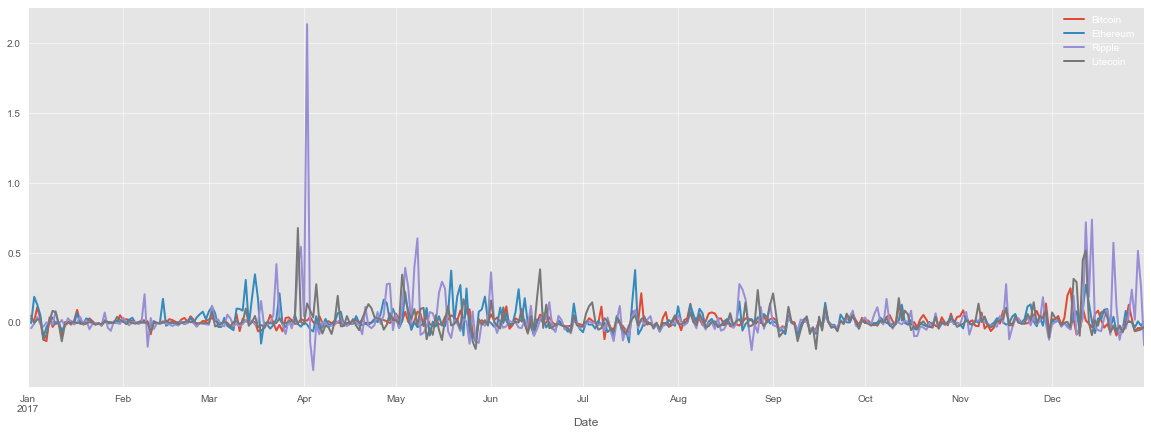

In [142]:
spremembe_high[izbira_kriptovalut].plot()

## Zaključek

Trg s kriptovalutami je zelo zanimiv, kljub razširjenosti, ki je dokaj očitno v preteklem letu zelo narastla, pa je to nenapovedljiv trg. V mesecu januarju leta 2018 je trg doživel ogromen padec in cene vseh kriptovalut (znanih in manj znanih) so padle tudi za 70%. 

Investiranje v kriptovalute je lahko kakor odlična naložba, tudi ogromna izguba, zato je pri investiranju potrebno poskrbeti za razpršenost (denar vložimo v več različnih kriptovalut).

Skozi projekt je bilo zanimivo opazovati trende trga, trende cen posameznih kriptovalut (še posebej "največjih 4") in videti njihovo povezavo. Za preteklost se da analizirati marsikaj, nam pa pretekli podatki žal ne povedo kaj prida o prihodnjih stanjih kripto trga, zato je napovedovanje cen in količine trgovanja na nek način naivno.